# Exercise -03

IT No: IT22607232

In [2]:
#!pip install tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [3]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [7 7 8 0 5 3 9 7 4 8]


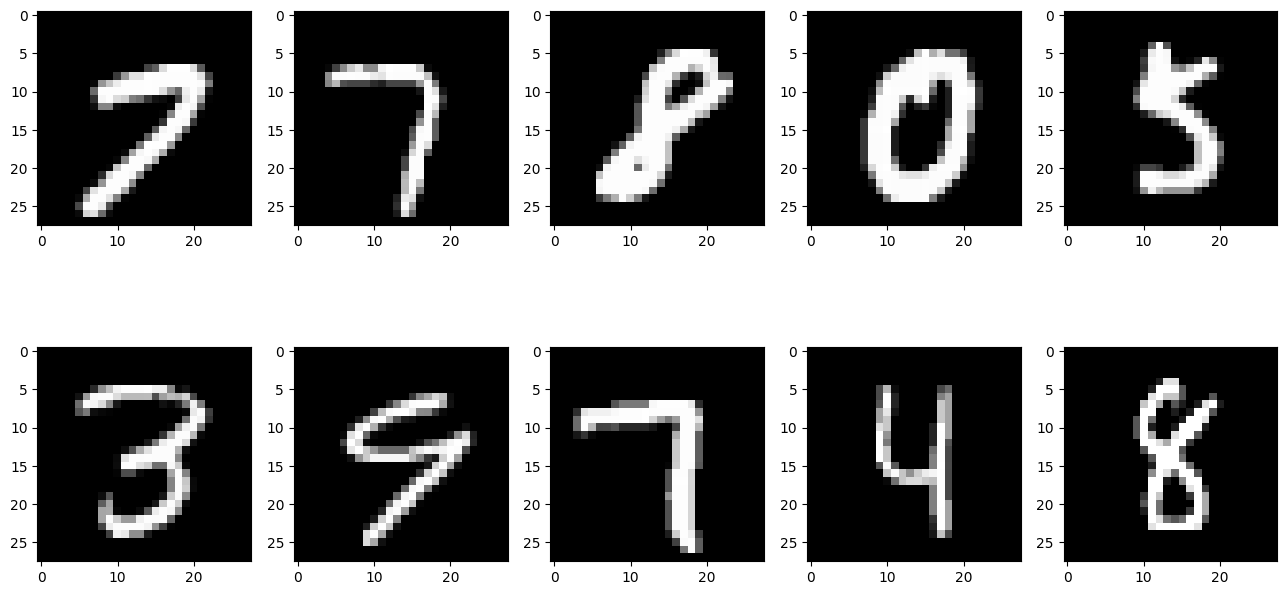

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])

for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

*   Before training, the data is pre-processed to make learning easier for the
model.

*   Pixel values are scaled from 0–255 to 0–1. This helps the model converge faster and improves numerical stability.




In [5]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

### **Part (a): Hyperparameter Tuning**

Improved test accuracy by adjusting hyperparameters:

*   Batch size = 128 (larger batches → faster, stable convergence).

*   EarlyStopping with patience=7 and restore_best_weights=True to prevent  overfitting.
*   Validation split = 0.2 for monitoring generalization.

*   Learning rate = 0.0003 (Adam optimizer) for smoother training.


### **Part (b): Regularization**

*   To reduce overfitting and enhance generalization, I added:
*   L1 regularization: Promotes sparsity by shrinking less important weights.
*   L2 regularization: Controls large weights, improving stability.
*   Combined L1 + L2: Applied in the first two hidden layers; L2 used in the third layer.


**The usage**

*   Hidden Layer 1 & 2: l1=1e-5, l2=1e-4 (L1 + L2 regularization).
*   Hidden Layer 3: l2=1e-4 only.
*   Dropout: 0.3 (layer 1) and 0.2 (layer 2).


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# Hidden layer 1 with L1 + L2
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization()) #stabilizes and speeds up training.
model.add(Dropout(0.3)) #prevents overfitting, improves generalization.

# Hidden layer 2 with L1 + L2
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layer 3 with L2 only
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0003),
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Larger batch → faster convergence.
# EarlyStopping → prevents overfitting.
# Validation split → allows monitoring generalization during training


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

Train the model

In [8]:
train_info = model.fit(new_train_data, new_train_target,
                       epochs=50,
                       batch_size=64,
                       validation_split=0.1,
                       callbacks=[early_stop])

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7403 - loss: 0.9794 - val_accuracy: 0.9607 - val_loss: 0.2651
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9346 - loss: 0.3436 - val_accuracy: 0.9715 - val_loss: 0.2167
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9517 - loss: 0.2801 - val_accuracy: 0.9730 - val_loss: 0.1977
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9601 - loss: 0.2440 - val_accuracy: 0.9768 - val_loss: 0.1902
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9654 - loss: 0.2181 - val_accuracy: 0.9803 - val_loss: 0.1801
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9693 - loss: 0.2047 - val_accuracy: 0.9777 - val_loss: 0.1757
Epoch 7/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9734 - loss: 0.1859 - val_accuracy: 0.9795 - val_loss: 0.1712
Epoch 8/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9734 - loss: 0.1814 - val_

Plot the loss and accuracy graphs

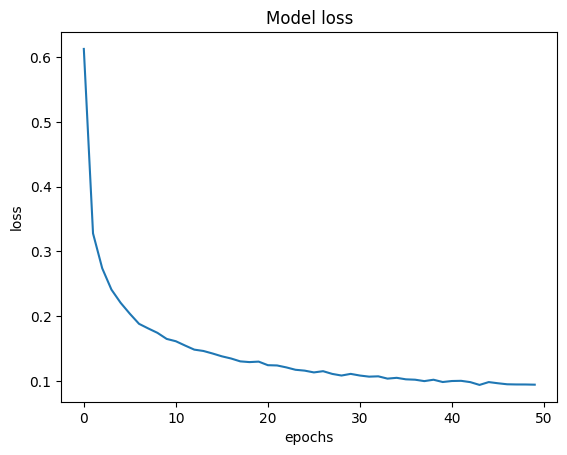

In [9]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

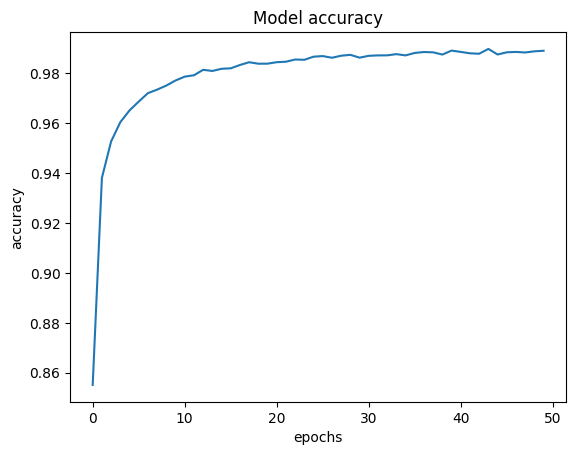

In [10]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [11]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.1316
Loss of the Test dataset is: 0.11980291455984116
Accuracy of the test dataset is: 0.982699990272522


Save the model weights

In [12]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [13]:
model.save('MNIST_MODEL_V1.keras')


### **Part (c): Class-wise Performance with Confusion Matrix**

  To evaluate the model’s performance across different digit classes, added visualized predictions using a confusion matrix.

  Rows represent the actual digits, while columns represent the predicted digits.

  The diagonal cells indicate correct classifications, and off-diagonal cells show misclassifications.

  This helps identify which digits the model predicts well and where it struggles (ex:confusion between visually similar digits like 4 and 9).


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


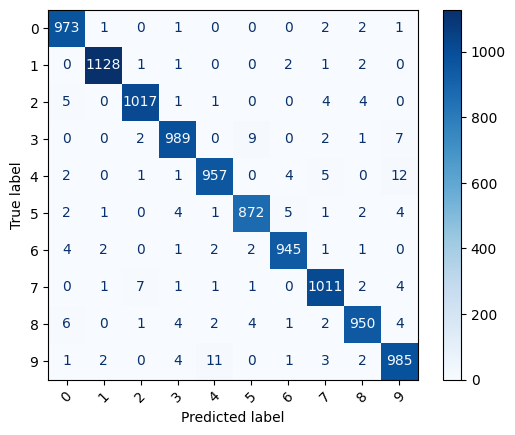

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)  # predicted digit
y_true = np.argmax(new_test_target, axis=1) # actual digit

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


### **Exercise 03 completion !!!**